## Library

In [1]:
import numpy as np
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action="ignore")

DATA_PATH = "/kaggle/input/coupon-purchase-prediction/"

## EDA
* coupon_detail_train/test.csv 쿠폰 구매 정보  
  ITEM_COUNT: 쿠폰 개수  
  I_DATE: 구매정보  
  SMALL_AREA_NAME: 지역 정보  
  PURCHASEID_hash: 구매 해시값  
  USER_ID_hash: 유저 해시값  
  COUPON_ID_hash: 쿠폰 해시값  
    
* coupon_list_train/test.csv 모든 쿠폰 정보  
  CAPSULE_TEXT: 장르  
  GENRE_NAME: 장르  
  PRICE_RATE: 원가 대비 할인율  
  CATALOG_PRICE: 원가  
  DISCOUNT_PRICE: 할인되는 금액  
  DISPFROM: 게시 시작날짜  
  DISPEND: 게시 종료날짜  
  DISPPERIOD: 게시기간  
  VALIDFROM: 사용가능 시작날짜  
  VALIDEND: 사용가능 종료날짜  
  VALIDPERIOD: 사용가능 기간  
  USABLE_DATE_MON: 월요일 사용가능 여부  
  USABLE_DATE_TUE: 화요일 사용가능 여부  
  USABLE_DATE_WED: 수요일 사용가능 여부  
  USABLE_DATE_THU: 목요일 사용가능 여부  
  USABLE_DATE_FRI: 금요일 사용가능 여부  
  USABLE_DATE_SAT: 토요일 사용가능 여부  
  USABLE_DATE_SUN: 일요일 사용가능 여부  
  USABLE_DATE_HOLIDAY: 공유힐 사용가능 여부  
  USABLE_DATE_BEFORE_HOLIDAY: 공휴일 외 사용가능 여부  
  large_area_name: 사용가능 지역  
  ken_name  
  small_area_name  
  COUPON_ID_hash: 쿠폰 해시값(PK)  
    
* user_list.csv 회원 정보  
  REG_DATE: 등록일자  
  SEX_ID: 성별  
  AGE: 나이  
  WITHDRAW_DATE: 탈퇴일자  
  PREF_NAME: 선호지역  
  USER_ID_hash: 유저 해시값(PK)  
    
* coupon_visit_train/test.csv 사용자의 웹사이트 방문, 구매 기록  
  PURCHASE_FLG: 구매여부  
  I_DATE: 방문일시  
  PAGE_SERIAL: 방문 페이지 번호  
  REFERRER_hash: 방문 참조값 해시값 (방문전 링크값인거 같은데 활용 어떻게 할지 잘 모르겠음)  
  VIEW_COUPON_ID_hash: 확인한 쿠폰값 해시값  
  USER_ID_hash: 유저 해시값  
  SESSION_ID_hash: 세션 해시값  
  PURCHASEID_hash: 구매 해시값  

### data overview

In [2]:
with zipfile.ZipFile(DATA_PATH + "coupon_detail_train.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_detail = pd.read_csv(file)

# 결과 확인
df_detail.info()

압축 안의 파일: ['coupon_detail_train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168996 entries, 0 to 168995
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ITEM_COUNT       168996 non-null  int64 
 1   I_DATE           168996 non-null  object
 2   SMALL_AREA_NAME  168996 non-null  object
 3   PURCHASEID_hash  168996 non-null  object
 4   USER_ID_hash     168996 non-null  object
 5   COUPON_ID_hash   168996 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.7+ MB


In [3]:
df_detail.head(1).T

,0
ITEM_COUNT,1
I_DATE,2012-03-28 15:06:06
SMALL_AREA_NAME,兵庫
PURCHASEID_hash,c820a8882374a4e472f0984a8825893f
USER_ID_hash,d9dca3cb44bab12ba313eaa681f663eb
COUPON_ID_hash,34c48f84026e08355dc3bd19b427f09a


In [4]:
with zipfile.ZipFile(DATA_PATH + "coupon_list_train.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_list = pd.read_csv(file)

# 결과 확인
df_list.info()


압축 안의 파일: ['coupon_list_train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19413 entries, 0 to 19412
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CAPSULE_TEXT                19413 non-null  object 
 1   GENRE_NAME                  19413 non-null  object 
 2   PRICE_RATE                  19413 non-null  int64  
 3   CATALOG_PRICE               19413 non-null  int64  
 4   DISCOUNT_PRICE              19413 non-null  int64  
 5   DISPFROM                    19413 non-null  object 
 6   DISPEND                     19413 non-null  object 
 7   DISPPERIOD                  19413 non-null  int64  
 8   VALIDFROM                   13266 non-null  object 
 9   VALIDEND                    13266 non-null  object 
 10  VALIDPERIOD                 13266 non-null  float64
 11  USABLE_DATE_MON             12408 non-null  float64
 12  USABLE_DATE_TUE             12408 non-null  float64


In [5]:
df_list.head(1).T

,0
CAPSULE_TEXT,グルメ
GENRE_NAME,グルメ
PRICE_RATE,50
CATALOG_PRICE,3000
DISCOUNT_PRICE,1500
DISPFROM,2011-07-08 12:00:00
DISPEND,2011-07-09 12:00:00
DISPPERIOD,1
VALIDFROM,2011-07-10
VALIDEND,2011-12-08


In [6]:
with zipfile.ZipFile(DATA_PATH + "coupon_visit_train.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_visit = pd.read_csv(file)

# 결과 확인
df_visit.info()

압축 안의 파일: ['coupon_visit_train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833180 entries, 0 to 2833179
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   PURCHASE_FLG         int64 
 1   I_DATE               object
 2   PAGE_SERIAL          int64 
 3   REFERRER_hash        object
 4   VIEW_COUPON_ID_hash  object
 5   USER_ID_hash         object
 6   SESSION_ID_hash      object
 7   PURCHASEID_hash      object
dtypes: int64(2), object(6)
memory usage: 172.9+ MB


In [7]:
df_visit.head(1).T

,0
PURCHASE_FLG,0
I_DATE,2012-03-28 14:15:00
PAGE_SERIAL,7
REFERRER_hash,7d3892e54acb559ae36c459978489330
VIEW_COUPON_ID_hash,34c48f84026e08355dc3bd19b427f09a
USER_ID_hash,d9dca3cb44bab12ba313eaa681f663eb
SESSION_ID_hash,673af822615593249e7c6a9a1a6bbb1a
PURCHASEID_hash,NaN


In [8]:
with zipfile.ZipFile(DATA_PATH + "user_list.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_user = pd.read_csv(file)

# 결과 확인
df_user.info()

압축 안의 파일: ['user_list.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22873 entries, 0 to 22872
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   REG_DATE       22873 non-null  object
 1   SEX_ID         22873 non-null  object
 2   AGE            22873 non-null  int64 
 3   WITHDRAW_DATE  922 non-null    object
 4   PREF_NAME      15617 non-null  object
 5   USER_ID_hash   22873 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


In [9]:
df_user.head(1).T

,0
REG_DATE,2012-03-28 14:14:18
SEX_ID,f
AGE,25
WITHDRAW_DATE,NaN
PREF_NAME,NaN
USER_ID_hash,d9dca3cb44bab12ba313eaa681f663eb


### 결측치 확인

In [10]:
print(f"<구매정보>\n{df_detail.isnull().sum()}\n")
print(f"<전체쿠폰정보>\n{df_list.isnull().sum()}\n")
print(f"<유저방문정보>\n{df_visit.isnull().sum()}\n")
print(f"<고객정보>\n{df_user.isnull().sum()}\n")

<구매정보>
ITEM_COUNT         0
I_DATE             0
SMALL_AREA_NAME    0
PURCHASEID_hash    0
USER_ID_hash       0
COUPON_ID_hash     0
dtype: int64

<전체쿠폰정보>
CAPSULE_TEXT                     0
GENRE_NAME                       0
PRICE_RATE                       0
CATALOG_PRICE                    0
DISCOUNT_PRICE                   0
DISPFROM                         0
DISPEND                          0
DISPPERIOD                       0
VALIDFROM                     6147
VALIDEND                      6147
VALIDPERIOD                   6147
USABLE_DATE_MON               7005
USABLE_DATE_TUE               7005
USABLE_DATE_WED               7005
USABLE_DATE_THU               7005
USABLE_DATE_FRI               7005
USABLE_DATE_SAT               7005
USABLE_DATE_SUN               7005
USABLE_DATE_HOLIDAY           7005
USABLE_DATE_BEFORE_HOLIDAY    7005
large_area_name                  0
ken_name                         0
small_area_name                  0
COUPON_ID_hash                   0
dtyp

In [11]:
print(df_detail.shape)
print(df_list.shape)
print(df_visit.shape)
print(df_user.shape)

(168996, 6)
(19413, 24)
(2833180, 8)
(22873, 6)


## Preprocessing

In [12]:
df_detail['I_DATE'] = pd.to_datetime(df_detail['I_DATE'])
df_detail['I_MONTH'] = df_detail['I_DATE'].dt.month
df_detail['I_DATE'] = df_detail['I_DATE'].dt.date

In [13]:
df_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168996 entries, 0 to 168995
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ITEM_COUNT       168996 non-null  int64 
 1   I_DATE           168996 non-null  object
 2   SMALL_AREA_NAME  168996 non-null  object
 3   PURCHASEID_hash  168996 non-null  object
 4   USER_ID_hash     168996 non-null  object
 5   COUPON_ID_hash   168996 non-null  object
 6   I_MONTH          168996 non-null  int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 8.4+ MB


In [14]:
df_list['PURCHASE_PRICE'] = df_list['CATALOG_PRICE'] - df_list['DISCOUNT_PRICE']

In [15]:
df_list.head(3)

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash,PURCHASE_PRICE
0,グルメ,グルメ,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,0.0,0.0,1.0,1.0,0.0,関東,埼玉県,埼玉,6b263844241eea98c5a97f1335ea82af,1500
1,グルメ,グルメ,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,...,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,cc031f250e8bad1e24060263b9fc0ddd,1080
2,グルメ,グルメ,50,7000,3500,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-16,2012-01-11,...,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,ba5e9b7453ca52ff711635a5d2e8102d,3500


### Merging: df_detail(구매기록) + df_list(쿠폰정보)

In [16]:
df_detail.head(3)

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash,I_MONTH
0,1,2012-03-28,兵庫,c820a8882374a4e472f0984a8825893f,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a,3
1,1,2011-07-04,銀座・新橋・東京・上野,1b4eb2435421ede98c8931c42e8220ec,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7,7
2,1,2011-07-16,恵比寿・目黒・品川,36b5f9ba46c44b65587d0b16f2e4c77f,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,7


In [17]:
df_list.head(3)

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash,PURCHASE_PRICE
0,グルメ,グルメ,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,0.0,0.0,1.0,1.0,0.0,関東,埼玉県,埼玉,6b263844241eea98c5a97f1335ea82af,1500
1,グルメ,グルメ,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,...,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,cc031f250e8bad1e24060263b9fc0ddd,1080
2,グルメ,グルメ,50,7000,3500,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-16,2012-01-11,...,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,ba5e9b7453ca52ff711635a5d2e8102d,3500


In [18]:
# PK확인
df_list.shape[0], len(df_list['COUPON_ID_hash'].unique())

(19413, 19413)

In [19]:
# PK확인
df_detail.shape[0], len(df_detail['PURCHASEID_hash'].unique())

(168996, 168996)

In [20]:
df = pd.merge(
    df_detail[['ITEM_COUNT','I_DATE','I_MONTH','SMALL_AREA_NAME','USER_ID_hash','COUPON_ID_hash', 'PURCHASEID_hash']],
    df_list[['GENRE_NAME','PRICE_RATE','PURCHASE_PRICE','COUPON_ID_hash']],
    on='COUPON_ID_hash',
    how='left'
)

In [21]:
df.head()

,ITEM_COUNT,I_DATE,I_MONTH,SMALL_AREA_NAME,USER_ID_hash,COUPON_ID_hash,PURCHASEID_hash,GENRE_NAME,PRICE_RATE,PURCHASE_PRICE
0,1,2012-03-28,3,兵庫,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a,c820a8882374a4e472f0984a8825893f,宅配,78,5625
1,1,2011-07-04,7,銀座・新橋・東京・上野,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7,1b4eb2435421ede98c8931c42e8220ec,宅配,50,1680
2,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,36b5f9ba46c44b65587d0b16f2e4c77f,グルメ,50,160
3,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,2f30f46937cc9004774e576914b2aa1a,グルメ,50,160
4,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,4d000c64a55ac573d0ae1a8f03677f50,グルメ,50,160


In [22]:
df.shape

(168996, 10)

In [23]:
df_detail['ITEM_COUNT'].max()

55

In [24]:
# PK확인
df_user.shape[0], len(df_user['USER_ID_hash'].unique())

(22873, 22873)

In [25]:
df = pd.merge(
    df,
    df_user[['SEX_ID','AGE','USER_ID_hash']],
    on='USER_ID_hash',
    how='left'
)

In [26]:
df.head()

,ITEM_COUNT,I_DATE,I_MONTH,SMALL_AREA_NAME,USER_ID_hash,COUPON_ID_hash,PURCHASEID_hash,GENRE_NAME,PRICE_RATE,PURCHASE_PRICE,SEX_ID,AGE
0,1,2012-03-28,3,兵庫,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a,c820a8882374a4e472f0984a8825893f,宅配,78,5625,f,25
1,1,2011-07-04,7,銀座・新橋・東京・上野,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7,1b4eb2435421ede98c8931c42e8220ec,宅配,50,1680,f,34
2,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,36b5f9ba46c44b65587d0b16f2e4c77f,グルメ,50,160,f,34
3,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,2f30f46937cc9004774e576914b2aa1a,グルメ,50,160,f,34
4,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,4d000c64a55ac573d0ae1a8f03677f50,グルメ,50,160,f,34


In [27]:
df.shape

(168996, 12)

In [28]:
df.isnull().sum()

ITEM_COUNT         0
I_DATE             0
I_MONTH            0
SMALL_AREA_NAME    0
USER_ID_hash       0
COUPON_ID_hash     0
PURCHASEID_hash    0
GENRE_NAME         0
PRICE_RATE         0
PURCHASE_PRICE     0
SEX_ID             0
AGE                0
dtype: int64

## RFM
구간분할 방식  
1. Quantile (33%, 66%)	상·중·하 분위로 3등분	균형적인 그룹 분할  
2. Natural break (분포기반)	실제 데이터 변곡점 기반 (예: 1회, 2~4회, 5회 이상)	해석력 높음  
3. Business rule	비즈니스적으로 의미 있는 기준	해석 명확

In [29]:
last = df['I_DATE'].max() + pd.DateOffset(days=1) # 마지막 거래일자 다음날을 기준일로 설정

rfm_df = df.groupby(['USER_ID_hash']).agg({
    'I_DATE': lambda x:(last-pd.to_datetime(x.max())).days,
    'PURCHASEID_hash': lambda x:x.nunique(),
    'PURCHASE_PRICE': sum
})
rfm_df.rename(columns={'거래날짜':'Recency', '거래':'Frequency', '지불금액':'Monetary'},inplace=True)

rfm_df.head(3)

,I_DATE,PURCHASEID_hash,PURCHASE_PRICE
USER_ID_hash,,,
0000b53e182165208887ba65c079fc21,275,1,4920
00035b86e6884589ec8d28fbf2fe7757,87,1,1620
0005b1068d5f2b8f2a7c978fcfe1ca06,311,2,53660


In [30]:
last = df['I_DATE'].max() + pd.DateOffset(days=1) # 마지막 거래일자 다음날을 기준일로 설정

rfm_df = df.groupby(['USER_ID_hash']).agg({
    'I_DATE': lambda x:(last-pd.to_datetime(x.max())).days,
    'PURCHASEID_hash': lambda x:x.nunique(),
    'PURCHASE_PRICE': sum
})
rfm_df.rename(columns={'I_DATE':'Recency', 'PURCHASEID_hash':'Frequency', 'PURCHASE_PRICE':'Monetary'},inplace=True)

rfm_df.head(3)

,Recency,Frequency,Monetary
USER_ID_hash,,,
0000b53e182165208887ba65c079fc21,275,1,4920
00035b86e6884589ec8d28fbf2fe7757,87,1,1620
0005b1068d5f2b8f2a7c978fcfe1ca06,311,2,53660


In [31]:
rfm_df.shape

(22782, 3)

### RFM visualization

## Scatter plot
* 데이터 많을때는 찍지 말것
* RFM 분석을 하기 전에 실제 데이터가 그 가정을 따르는지를 확인용 (분석 전 진단용 시각화)
* 고객 행동이 전형적인 RFM 패턴을 따름 (R낮을수록 F,M이 높음)
* 고객 행동이 예측 가능한 구조이므로 RFM segmentation의 설명력이 올라감

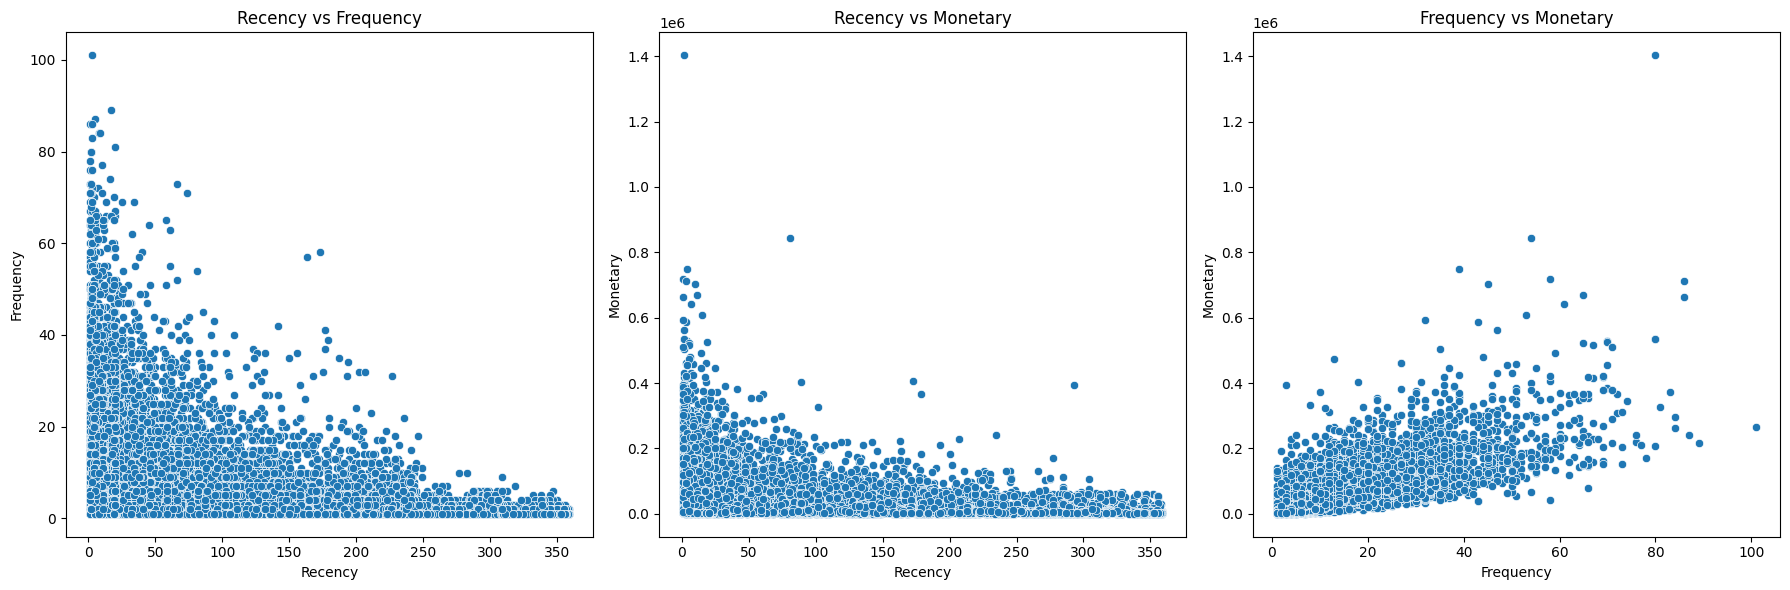

In [60]:
# 건수 많을 때는 전체 데이터셋으로 scatterplot 그리는 것 지양

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency')
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary')
plt.title('Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.subplot(1, 3, 3)
sns.scatterplot(data=rfm_df, x='Frequency', y='Monetary')
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

plt.tight_layout()
plt.show()

### Recency 분석결과
* 0\~25일: 대다수의 고객 집중
* 25\~100일: 완만한 감소
* 100일\~: 거의 변화없음

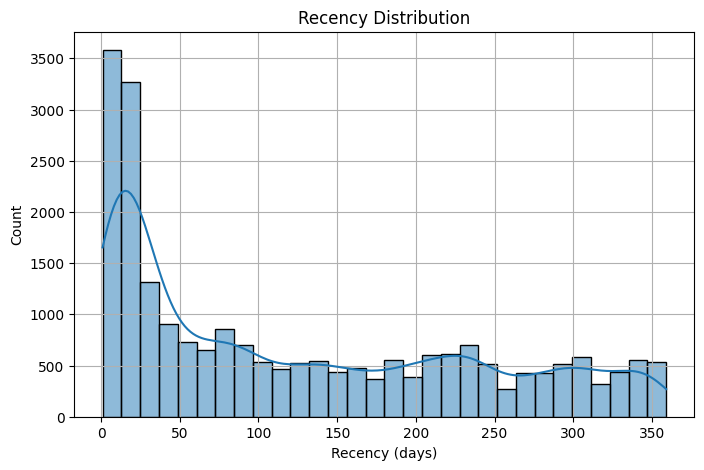

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm_df, x='Recency', bins=30, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Log-scaled Recency Distribution')

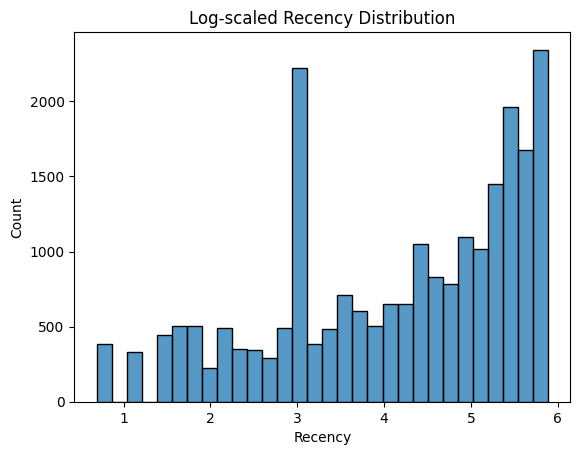

In [33]:
sns.histplot(np.log1p(rfm_df['Recency']), bins=30)
plt.title("Log-scaled Recency Distribution")

### Frequency 분석결과
* 0\~5일: 대다수의 고객 집중
* 5\~40일: 완만한 감소
* 40일\~: 거의 변화없음

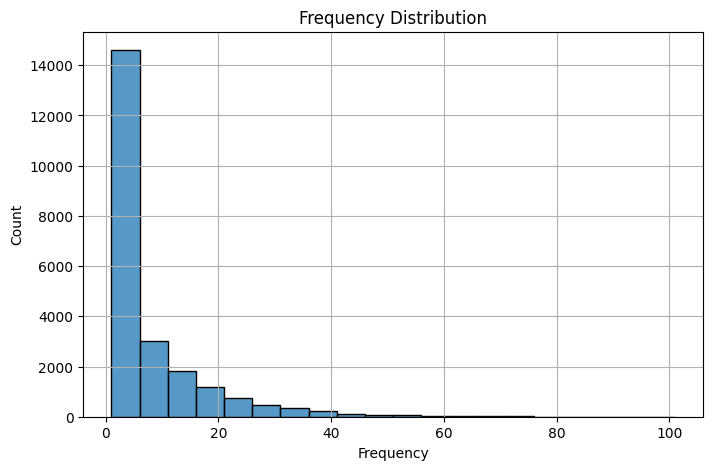

In [34]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm_df, x='Frequency', bins=20, kde=False)
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.grid(True)
plt.show()

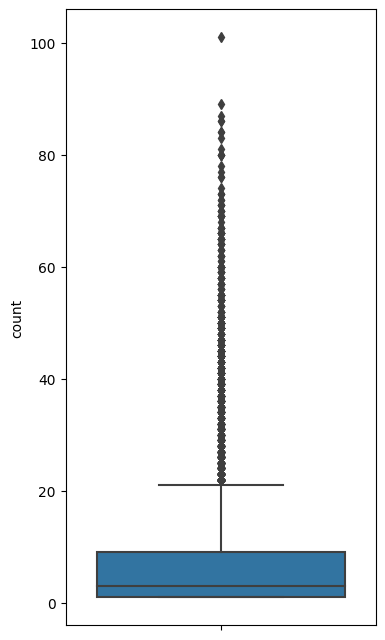

In [35]:
plt.figure(figsize=(4,8))
sns.boxplot(data=rfm_df, y='Frequency')
plt.ylabel('count')
plt.show()

### Monetary 분석결과
* 0\~0.7 (0\~70,000): 대다수의 고객 집중
* 0.7\~3.3 (70,000\~330,000): 완만한 감소
* 3.3\~ (330,000\~): 거의 변화없음

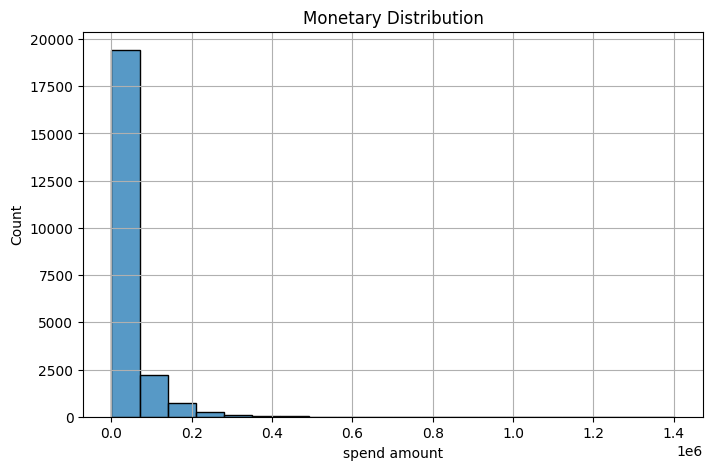

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm_df, x='Monetary', bins=20, kde=False)
plt.title('Monetary Distribution')
plt.xlabel('spend amount')
plt.ylabel('Count')
plt.grid(True)
plt.show()

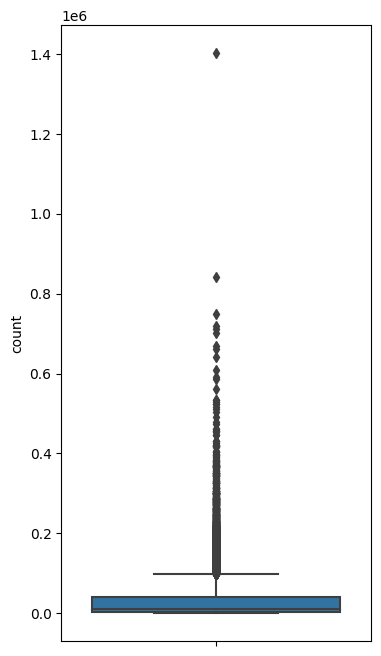

In [37]:
plt.figure(figsize=(4,8))
sns.boxplot(data=rfm_df, y='Monetary')
plt.ylabel('count')
plt.show()

### recency grading

In [ ]:
'''
def assign_R(recency):
    if recency <= 30:
        return 5
    elif recency <= 60:
        return 4
    elif recency <= 90:
        return 3
    elif recency <= 180:
        return 2
    elif recency <= 365:
        return 1
    else:
        return 0
'''
# 일반적인 비즈니스 분할방식 30,60,90,180,365

In [50]:
def assign_R(recency):
    if recency <= 25:
        return 3
    elif recency <= 100:
        return 2
    else:
        return 1

# rfm_df['R'] = assign_R(rfm['Recency'])는 틀림. 함수에 Recency값 전체를 넣기 때문
rfm_df['R'] = rfm_df['Recency'].apply(assign_R)

In [51]:
rfm_df.head()

,Recency,Frequency,Monetary,R,Frequency_adj
USER_ID_hash,,,,,
0000b53e182165208887ba65c079fc21,275,1,4920,1,1
00035b86e6884589ec8d28fbf2fe7757,87,1,1620,2,1
0005b1068d5f2b8f2a7c978fcfe1ca06,311,2,53660,1,2
000cc06982785a19e2a2fdb40b1c9d59,31,21,54606,2,21
0013518e41c416cd6a181d277dd8ca0b,59,4,33095,2,4


In [52]:
rfm_df.groupby('R').count()

,Recency,Frequency,Monetary,Frequency_adj
R,,,,
1,10580,10580,10580,10580
2,5235,5235,5235,5235
3,6967,6967,6967,6967


In [53]:
rfm_df.groupby('R').mean()

,Recency,Frequency,Monetary,Frequency_adj
R,,,,
1,229.049811,2.774764,11739.587335,2.727032
2,59.060936,8.042025,37190.413181,7.306590
3,11.977752,14.000144,62250.820726,11.158605


### frequency grading

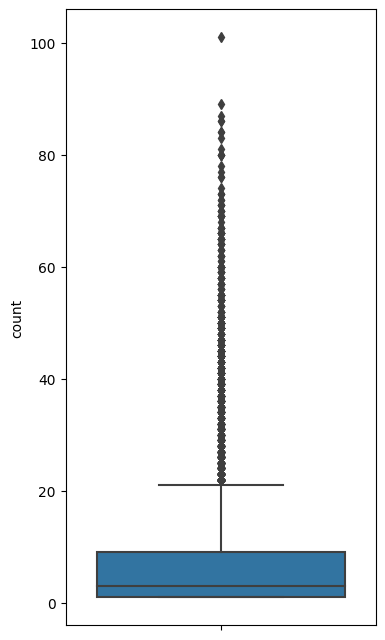

In [42]:
plt.figure(figsize=(4,8))
sns.boxplot(data=rfm_df, y='Frequency')
plt.ylabel('count')
plt.show()

In [43]:
rfm_df[rfm_df['Frequency'] >= 20].shape

(2322, 4)

In [44]:
rfm_df['Frequency'].min(), rfm_df['Frequency'].max(), rfm_df['Frequency'].mean().round(2), rfm_df['Frequency'].median()

(1, 101, 7.42, 3.0)

In [45]:
rfm_df['Frequency_adj'] = rfm_df['Frequency'].apply(lambda x: 21 if x>=21 else x)

In [46]:
# quantile binning(값이 비슷하게)
q_binned = pd.qcut(rfm_df['Frequency_adj'], q=3)
q_binned.value_counts().sort_index()

Frequency_adj
(0.999, 2.0]    9677
(2.0, 6.0]      5706
(6.0, 21.0]     7399
Name: count, dtype: int64

In [47]:
# quantile binning(값이 비슷하게)
u_binned = pd.cut(rfm_df['Frequency_adj'], bins=20)
u_binned.value_counts().sort_index()

Frequency_adj
(0.98, 2.0]     9677
(2.0, 3.0]      2257
(3.0, 4.0]      1576
(4.0, 5.0]      1092
(5.0, 6.0]       781
(6.0, 7.0]       703
(7.0, 8.0]       542
(8.0, 9.0]       543
(9.0, 10.0]      443
(10.0, 11.0]     412
(11.0, 12.0]     390
(12.0, 13.0]     353
(13.0, 14.0]     342
(14.0, 15.0]     339
(15.0, 16.0]     265
(16.0, 17.0]     293
(17.0, 18.0]     226
(18.0, 19.0]     226
(19.0, 20.0]     186
(20.0, 21.0]    2136
Name: count, dtype: int64

In [48]:
# rfm_df['F'] = pd.cut(rfm_df['Frequency_adj'], bins=5, labels=[1,2,3,4,5])

In [56]:
def assign_F(frequency):
    if frequency <= 5:
        return 1
    elif frequency <= 40:
        return 2
    else:
        return 3

rfm_df['F'] = rfm_df['Frequency'].apply(assign_F)

In [61]:
rfm_df['F'].value_counts()

F
1    14602
2     7802
3      378
Name: count, dtype: int64

### Monetary grading

In [64]:
def assign_M(Monetary):
    if Monetary <= 70000:
        return 1
    elif Monetary <= 330000:
        return 2
    else:
        return 3

rfm_df['M'] = rfm_df['Monetary'].apply(assign_M)

In [66]:
rfm_df['M'].value_counts()

M
1    19410
2     3274
3       98
Name: count, dtype: int64

### RFM score 생성

In [71]:
rfm_df['RFM_Score'] = rfm_df['R'] + rfm_df['F'] + rfm_df['M']

rfm_df.sample(5)

,Recency,Frequency,Monetary,R,Frequency_adj,F,M,RFM_Score
USER_ID_hash,,,,,,,,
713b5a83cd0ee4c8aa51a72245e02e2a,76,6,52074,2,6,2,1,5
2eaab05032074d46880906fc4640e9b3,8,25,109882,3,21,2,2,7
c9eac28bbcc9e523f737900595a4a262,208,2,1920,1,2,1,1,3
940e9a39b60b93ae3e3722419fb23f9b,138,9,29205,1,9,2,1,4
a82dc8e5164a21941b7317ab616ecc75,1,5,24251,3,5,1,1,5


In [72]:
rfm_df.groupby(['RFM_Score'])[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
RFM_Score,,,
3,237.126802,1.881043,7230.668787
4,89.196957,4.030155,16000.410486
5,37.875975,6.777534,25252.610136
6,21.636228,14.184117,57400.210291
7,10.875743,23.108050,128740.473798
8,8.156463,49.700680,216824.010204
9,6.086207,60.896552,462755.879310


### RFM 기반 고객 분류
* 3\~4: 이탈고객
* 5\~7: 잠재활성가능고객
* 8\~9: 충성고객

In [ ]:
# 예시코드

def classify_customer(row):
    r, f, m = row['R'], row['F'], row['M']

     # VIP
    if r >= 5 and f >= 5 and m >= 5:
        return 'VIP'
    # VIP이탈고객: Recency 점수가 3 이하이며, 나머지 점수가 4 이상
    elif r <= 3 and (f >= 4 and m >= 4):
        return 'VIP이탈고객'
    elif f >= 4 and r >= 4 and m >= 4:
        return '충성고객'
    elif f >= 3 and r >= 3 and m >= 3:
        return '충성예정고객'
    elif r <= 2 and f >= 3:
        return '충성이탈예정고객'
    else:
        return '일반고객'  # 이외의 경우를 위한 기본값

rfm_df['고객등급'] = rfm_df.apply(classify_customer, axis=1)